In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as st

import seaborn as sns

In [13]:
filename = "../../relative_employers.csv"
relative_df=pd.read_csv(filename)
relative_df=relative_df.iloc[:,0:16]
relative_df

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income,Operating income per employee,MSCI SECTOR,Sector perf,RELATIVE STOCK PERF
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.8,Suwon,-22.34,13.29,1.8,9.094390e+13,341031566,MSCI World Semiconductors and Semiconductor Eq...,-36.44,14.10
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.4,Redmond,-22.65,42.88,1.8,9.884100e+10,447244,MSCI World Information Technology Index,-30.79,8.14
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.2,Armonk,7.79,6.48,2.5,1.201000e+10,48040,MSCI World Semiconductors and Semiconductor Eq...,-36.44,44.23
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.5,Mountain View,-33.69,26.89,1.5,9.373300e+10,598932,MSCI World Information Technology Index,-30.79,-2.90
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.1,Cupertino,-22.48,175.46,2.0,1.305410e+11,847668,MSCI World Semiconductors and Semiconductor Eq...,-36.44,13.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,94,De'Longhi,DLG.MI,"Engineering, Manufacturing",Italy,10000,4.0,Treviso,-22.58,11.61,2.5,3.211760e+08,32117,MSCI World Industrials Index,-13.20,-9.38
66,96,Mastercard,MA,Banking and Financial Services,United States,24000,4.3,Purchase,2.26,147.74,1.8,1.308000e+10,545000,MSCI ACWI Financials Index,-9.23,11.49
67,97,Electricite de France,EDF.PA,Utilities,France,167157,4.0,Paris,15.94,-6.42,2.6,7.234000e+09,43276,MSCI World Utilities Index,-6.99,22.93
68,98,Verbund,VER.VI,Utilities,Austria,3184,4.7,Vienna,-21.58,26.71,3.2,2.274543e+09,714366,MSCI World Utilities Index,-6.99,-14.59


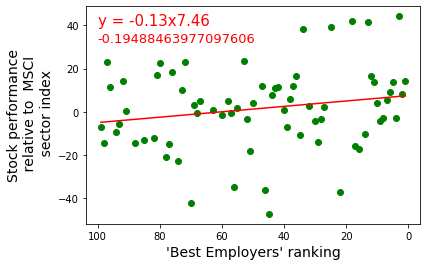

In [37]:
rank=relative_df['RANK']
rel_perf=relative_df['RELATIVE STOCK PERF']



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(rank, rel_perf)
regress_values = rank * slope+intercept
line_eq=f"y = {round(slope,2)}x{round(intercept,2)}"
plt.scatter(rank,rel_perf, color='green')
plt.gca().invert_xaxis()
plt.plot(rank,regress_values,"r-")
plt.xlabel("'Best Employers' ranking",size=14)
plt.ylabel("Stock performance\n relative to  MSCI\n sector index",size=14, rotation=90)
plt.annotate(line_eq,(100,40),fontsize=15,color="red")
plt.annotate(rvalue,(100,32),fontsize=13,color="red")
plt.show()
